# MongoDB

- MongoDB is a document or NO SQL Database. We don´t have the concept of tables, schemas, views, records, columns, ... We simply store JSON objects in MongoDB.

**To install MongoDB on Windows:** 
- Download mongodb(https://www.mongodb.com/try/download/community)
- Complete instalation
- Download MongoDB Compass (https://www.mongodb.com/try/download/compass) and install it
- Go to **C:\Program Files\MongoDB\Server\6.0\bin** and copy the route. In this folder should be mongod file.
- Search fo **Advanced System Settings** in the search bar.
- In the emergent window select **Environment Variables**
- In **System Variables** select **Path** and click on *Edit*
- In the emergent window click on **New** and paste the copied route (**C:\Program Files\MongoDB\Server\6.0\bin**). This is the path to the directory that contains the MongoDb server. 
- Click on **OK** and close.
- Open **cmd** and run **mongod**. By default we should get an error about path. Something like **Path: Datadirectory C:\data\db not found** should appear in console.
- To create this folder: **md c:\data\db** on console.
- Run **mongod** again and the previous error should not appear. MongoDB server is running.

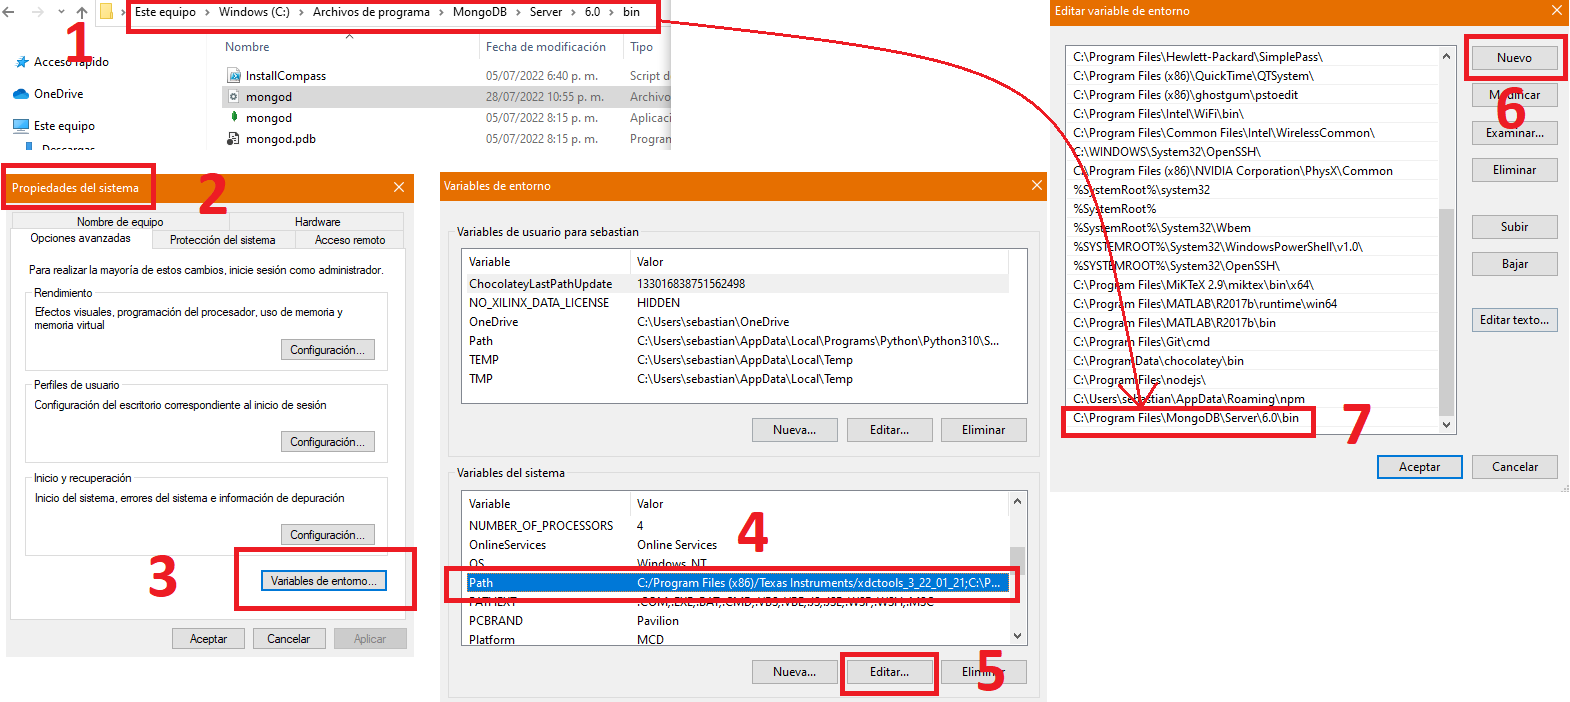

# Conecting to MongoDB

- We first install mongoose. **npm i mongoose** and create an index.js file. Mongoose is a simple api to work with mongodb database.
- In connection we specify we want to work with playground database. MongoDb automatically create this database
- This connection method returns a promise


In [ ]:
//index.js
//-------------------------------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/playgraound')
    .then(() => console.log('Connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDB...'))

# Schemas

- We use **schema** to define the shape of documents within a collection in MongoDB. Schema is specific to mongoose, not part of mongoDB.
- A collection in mongoDB is like a table in relational database.
- A document in mongoDB is like a row in a relational database. It contains key-value pairs

**Schema Types**:

String, Number, Date, Buffer (binary data),  Boolean, ObjectID (unique identifiers), Array.

In [1]:
//index.js
//-------------------------------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/playground')
    .then(() => console.log('Connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDB...'))

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: { type: Date, default: Date.now},
    isPublished: Boolean
});

Promise { <pending> }

Connected to mongoDB...


# Models

- To create a class we need to compile the created schema (*courseSchema*) into a model. 

- For this purpose We use **model** method. The first argument is the singular name of the collection that this model is for. In this exercise we want to have a collection called Courses, so the singular name is **Course**. The second argument is the schema **courseSchema**. With this, we get the Course class in our app.

- Then, we can create an instance (object) of created class, and we can pass object to inicialize it. This object maps to a document in a mongoDB database.

- Something interesting in mongoDB (or in NO SQL databases in general) is that document can be a complex object. The **tags** property is an array of strings; we don´t have something like that in relational databases because its rows has simple attributes. 

In [ ]:
//index.js
//-------------------------------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/playground')
    .then(() => console.log('Connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDB...'))

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: { type: Date, default: Date.now},
    isPublished: Boolean
});

const Course = mongoose.model('Course', courseSchema);
const course = new Course({
    name: 'Node.js Course',
    author: 'Mosh',
    tags: ['node', 'backend'],
    isPublished: true
});

# Saving a Document

- To save a document we use **save** method. This is an asynchronous operation so it returns a promise.
- When we save a document, mongoDB will asignt to it a unique identifier.

In [ ]:
//index.js
//-------------------------------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/playground')
    .then(() => console.log('Connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDB...'))

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: { type: Date, default: Date.now},
    isPublished: Boolean
});

const Course = mongoose.model('Course', courseSchema);

async function createCourse(){
    const course = new Course({
        name: 'Node.js Course',
        author: 'Mosh',
        tags: ['node', 'backend'],
        isPublished: true
    });

    const result = await course.save();
    console.log(result);
}

createCourse();

// console
//--------------------------------------------
// C:\Users\sebastian\Desktop\nodejs\07_CRUD Operations Using Mongose>node index.js

//output
//--------------------------------------------
// Connected to mongoDB...
// {
//   name: 'Node.js Course',
//   author: 'Mosh',
//   tags: [ 'node', 'backend' ],
//   isPublished: true,
//   _id: new ObjectId("62e97e3881290b941ba62abf"),
//   date: 2022-08-02T19:42:48.679Z,
//   __v: 0
// }

- After run index.js, we can refresh *MongoDB Compass* and see that **playground** database with **Courses collection** was created.  
- We create another course with different properties

In [ ]:
//index.js
//-------------------------------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/playground')
    .then(() => console.log('Connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDB...'))

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: { type: Date, default: Date.now},
    isPublished: Boolean
});

const Course = mongoose.model('Course', courseSchema);

async function createCourse(){
    const course = new Course({
        name: 'Angular Course',
        author: 'Mosh',
        tags: ['Angular', 'frontend'],
        isPublished: true
    });

    const result = await course.save();
    console.log(result);
}

async function getCourses(){
    Course.find()
}

createCourse();

// console
//--------------------------------------------
// C:\Users\sebastian\Desktop\nodejs\07_CRUD Operations Using Mongose>node index.js



# Querying Documents

In [ ]:
//index.js
//-------------------------------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/playground')
    .then(() => console.log('Connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDB...'))

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: { type: Date, default: Date.now},
    isPublished: Boolean
});

const Course = mongoose.model('Course', courseSchema);

async function createCourse(){
    const course = new Course({
        name: 'Angular Course',
        author: 'Mosh',
        tags: ['Angular', 'frontend'],
        isPublished: true
    });

    const result = await course.save();
    console.log(result);
}

async function getCourses(){
    const courses = await Course
        .find({ author: 'Mosh', isPublished: true }) // returns a document query filtered by author and publication
        .limit(10) // show only 10 documents
        .sort({ name: 1 }) // sorted by name in ascending order (1)
        .select({ name: 1, tags: 1 });// Show only name and tags properties
    
    console.log(courses);
}

getCourses();

// console
//--------------------------------------------
// C:\Users\sebastian\Desktop\nodejs\07_CRUD Operations Using Mongose>node index.js


//output
//---------------------------------------------
// Connected to mongoDB...
// [
//   {
//     _id: new ObjectId("62e9801f02aa291f1fceb6c7"),
//     name: 'Angular Course',
//     tags: [ 'Angular', 'frontend' ]
//   },
//   {
//     _id: new ObjectId("62e97e3881290b941ba62abf"),
//     name: 'Node.js Course',
//     tags: [ 'node', 'backend' ]
//   }
// ]

# Comparison Query Operators

-  In mongoDB we have operator for comparison values. Since mongoose is built on top of mongoDB driver these operators are also available on mongoose.

**Operators:**
eq(equal)
ne(not equal)
gt(greater than)
gte(greater than or equal to)
lt(less than)
lte(less than or equal to)
in
nin(not in)

- To indicate that something is an operator we use dollar sign $. 

In [ ]:
async function getCourses(){
    const courses = await Course
        .find({ price: { $gt: 20 } })// returns courses with price greater than 20 dollars 
        .find({ price: { $gte: 20, $lte: 40 } })// returns courses with price between 20 and 40 dollars
        .find({ price: { $in: [10, 15, 20] } })// returns courses with price 10, 15, or 20 dollars 
}

# Logical Operators

In [ ]:
async function getCourses(){
    const courses = await Course
    // courses with author Mosh or isPublished true
        .find()
        .or([{ author: 'Mosh' }, { isPublished: true }])
}

# Regular Expression

- In Regexp we use **^** to represent string that starts with something; it does not matter what we have after.
- In Regexp **$** indicates ends of string. the **i** at the end of Regexp indicates that is not case sensitive.

In [ ]:
async function getCourses(){
    const courses = await Course
    // courses which author starts with Mosh
        .find({ author: /^Mosh/ })
    
    // courses which author ends with Hammedani
        .find({ author: /Hammedani$/i })
    
    // courses which author contains the word Mosh
        .find({ author: /.*Mosh.*/i })
}

# Counting

In [ ]:
async function getCourses(){
    const courses = await Course
        .find({ author: 'mosh', isPublished: true }) // returns a document query filtered by author and publication
        .limit(10) // show only 10 documents
        .sort({ name: 1 }) // sorted by name in ascending order (1)
//         .select({ name: 1, tags: 1 });// Show only name and tags properties
        .count(); // returns the count of documets that fits the criteria pf the filters
    console.log(courses);
}

# Pagination

- In a real world app, it can be passed query string parameters to a RESTful api´s. For example:

**/api/courses?pageNumber=2&pageSize=10**.

In order to implement pagination, we need to skip all the documnets in the previous page.

- In this example we set pageNumber and pageSize just for demonstration.

In [ ]:
async function getCourses(){
    const pageNumber = 2;
    const pageSize = 10;
    
    const courses = await Course    
        .find({ author: 'mosh', isPublished: true }) // returns a document query filtered by author and publication
        .skip((pageNumber-1) * pageSize)
        .limit(pageSize) // show only 10 documents
        .sort({ name: 1 }) // sorted by name in ascending order (1)
        .select({ name: 1, tags: 1 });// Show only name and tags properties
        
    console.log(courses);
}

# Exercise

- We use **mongoimport --db --collection courses --file exercise-data.json --jsonArray** command to import data into a mongo database. *db* is the name of database (mongo-exercises for this case). We use *jsonArray* because the data that we have in the json file is represented using an array.

To use **mongoimport** we need to separately download the tools:
**To install MongoDB on Windows:** 
- Download MongoDB Database Tools(https://www.mongodb.com/try/download/database-tools?tck=docs_databasetools)
- Complete instalation
- Go to **C:\Program Files\MongoDB\Tools\version\bin** and copy the route.
- Search fo **Advanced System Settings** in the search bar.
- In the emergent window select **Environment Variables**
- In **System Variables** select **Path** and click on *Edit*
- In the emergent window click on **New** and paste the copied route (**C:\Program Files\MongoDB\Tools\100\bin**). 
- Click on **OK** and close.

- We can go to mongoDB Compass and see the new database with loaded data.


In this Execise we get all the published backend courses, sort them by their name, pick only their name and author, and display them

In [ ]:
//solution
//--------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/mongo-exercises')
    .then(() => console.log('connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDb...'));

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: Date,
    isPublished: Boolean,
    price: Number
});

const Course = new mongoose.model('Course', courseSchema); 

async function getCourses(){
    return await Course
        .find({ tags: 'backend', isPublished: true })
        // .and([{ tags: 'backend' }, { isPublished: true }])
        .sort({ name: 1})
        .select({ name: 1, author: 1 });

}

async function run(){
    const courses = await getCourses();
    console.log(courses);        
}

run();

# Exercise 2

In this Execise we get all the published frontend and backend courses, sort them by their price in descendent order, pick only their name and author, and display them

In [ ]:
//solution
//--------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/mongo-exercises')
    .then(() => console.log('connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDb...'));

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: Date,
    isPublished: Boolean,
    price: Number
});

const Course = new mongoose.model('Course', courseSchema); 

async function getCourses(){
    return await Course
//         .find({ isPublished: true })
//         .or([{ tags: 'frontend' }, { tags: 'backend' }]) //option 1
        .find({ isPublished: true , tags: {$in: ['frontend', 'backend']} }) //option 2
        .sort({ price: -1})
        .select({ name: 1, author: 1 });

}

async function run(){
    const courses = await getCourses();
    console.log(courses);        
}

run();

# Exercise 3

In this Execise we get all the published courses that are $15 or more, or have the word 'by' in their title.

In [ ]:
//solution
//--------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/mongo-exercises')
    .then(() => console.log('connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDb...'));

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: Date,
    isPublished: Boolean,
    price: Number
});

const Course = new mongoose.model('Course', courseSchema); 

async function getCourses(){
    return await Course
        // .find({ tags: 'frontend', tags: 'backend', isPublished: true })
        .find({isPublished: true})
        .or([{ price: {$gte: 15} }, { name: /.*by.*/i }])
        .sort({ price: -1})
        .select({ name: 1, author: 1, price: 1 });

}

async function run(){
    const courses = await getCourses();
    console.log(courses);        
}

run();

# updating a document
## Query First

- We are going to see how to update a document using query first aprpoach.
- This approach is useful if we receive an input from the client and we want to make sure that the update is a valid operation. 

**IMPORTANT**

We need to change id from string to ObjectId for each element in **exercise-data.json**:

{"_id":"5a68fdc3615eda645bc6bdec",...} => **"_id":{"$oid":"5a68fdc3615eda645bc6bdec",...}**


In [ ]:
//solution
//--------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/mongo-exercises')
    .then(() => console.log('connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDb...'));

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: Date,
    isPublished: Boolean,
    price: Number
});

const Course = new mongoose.model('Course', courseSchema); 

async function updateCourse(id) { 
    // find course by id
    const course = await Course.findById(id);
    if(!course) return;
    // Update information
    course.author = 'New Author';
    course.isPublished = false;
    
    //save Updated course
    const result = await course.save();
    
    console.log(result);
}

updateCourse('5a68fdc3615eda645bc6bdec');


//console
//---------------------------------------------------
// C:\Users\sebastian\Desktop\nodejs\07_CRUD Operations Using Mongose>node index.js


//output
//---------------------------------------------------
// connected to mongoDB...
// {
//   _id: new ObjectId("5a68fdc3615eda645bc6bdec"),
//   tags: [ 'express', 'backend' ],
//   date: 2018-01-24T21:42:27.388Z,
//   name: 'Express.js Course',
//   author: 'New Author',
//   isPublished: false,
//   price: 10,
//   __v: 0
// }

## Updating First
With this we can update multiple documents in mongo.
- In this exmple we update by id, and we use **set** update operator (see mongodb update operators).

In [ ]:
//solution
//--------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/mongo-exercises')
    .then(() => console.log('connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDb...'));

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: Date,
    isPublished: Boolean,
    price: Number
});

const Course = new mongoose.model('Course', courseSchema); 

async function updateCourse(id) { 
    const result = await Course.findByIdAndUpdate({ _id: id},{
        $set: {
            author: 'Mosh',
            isPublished: true
        }
    });
    
    console.log(result);
}

updateCourse('5a68fdc3615eda645bc6bdec');

//console
//---------------------------------------------------
// C:\Users\sebastian\Desktop\nodejs\07_CRUD Operations Using Mongose>node index.js


//output
//---------------------------------------------------
// connected to mongoDB...
// {
//   _id: new ObjectId("5a68fdc3615eda645bc6bdec"),
//   tags: [ 'express', 'backend' ],
//   date: 2018-01-24T21:42:27.388Z,
//   name: 'Express.js Course',
//   author: 'New Author',
//   isPublished: false,
//   price: 10,
//   __v: 0
// }

# Removing Documents

In [ ]:
//solution
//--------------------------------------
const mongoose = require('mongoose');

mongoose.connect('mongodb://localhost/mongo-exercises')
    .then(() => console.log('connected to mongoDB...'))
    .catch(err => console.error('Could not connect to mongoDb...'));

const courseSchema = new mongoose.Schema({
    name: String,
    author: String,
    tags: [ String ],
    date: Date,
    isPublished: Boolean,
    price: Number
});

const Course = new mongoose.model('Course', courseSchema); 

async function removeCourse(id) { 
    // deleting one document

    const result = await Course.deleteOne({_id: id})
    console.log(result);
    
    // //deleting multiple documents

    // const result = await Course.deleteMany({isPublished: false});
    // console.log(result);

}

removeCourse('5a68fdc3615eda645bc6bdec');

//console
// C:\Users\sebastian\Desktop\nodejs\07_CRUD Operations Using Mongose>node index.js

//output
// connected to mongoDB...
// { acknowledged: true, deletedCount: 1 }